<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Fitabase_Reression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install glob2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from glob import glob
import os
import pandas as pd
path = "/content/drive/MyDrive/Iqram Sir/Fitabase data pulls - seperate"


In [21]:
def get_contenct(patient_folder_adrs):

  post_adrs = sorted(glob(patient_folder_adrs+"/*"))[0]
  

  pre_adrs = sorted(glob(patient_folder_adrs+"/*"))[1]

  for i in glob(post_adrs+"/*"):
    if "1min" in i.split("_"):
      post_1min = i
    if "minuteCaloriesNarrow" in i.split("_"):
      post_cal = i

  for i in glob(pre_adrs+"/*"):
    if "1min" in i.split("_"):
      pre_1min = i
    if "minuteCaloriesNarrow" in i.split("_"):
      pre_cal = i
 
  return post_1min, post_cal, pre_1min, pre_cal


In [23]:
sub = '024-DP'

for i in glob(path+"/*"):
  #get_contenct(i)
  if sub in i.split("/"):
    Post_1min, Post_cal, Pre_1min, Pre_cal = get_contenct(i)



In [25]:
df_post_1min = pd.read_csv(Post_1min)
df_post_cal = pd.read_csv(Post_cal)
df_pre_1min = pd.read_csv(Pre_1min)
df_pre_cal = pd.read_csv(Pre_cal)

In [ ]:
df_post_1min.head()

In [ ]:
df_post_cal.head()

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


def reg_post_pre(df_1min, df_cal):
  list_1 = list(df_1min["Time"])
  list_2 = list(df_cal["ActivityMinute"])

  hr = []
  aee = []
  time = []

  if len(list_1)>len(list_2):
    for i in list_1:
      if i in list_2:
        hr.append(list(df_1min.query("Time == '"+i+"'")['Value'])[0])
        aee.append(list(df_cal.query("ActivityMinute == '"+i+"'")['Calories'])[0]*4.184)
        time.append(i)

  else:
    for i in list_2:
      if i in list_1:
        hr.append(list(df_1min.query("Time == '"+i+"'")['Value'])[0])
        aee.append(list(df_cal.query("ActivityMinute == '"+i+"'")['Calories'])[0]*4.184)
        time.append(i)

  d={
    "Time" : time,
     "HR(BPM)" : hr,
     "aEE(kJ/min)":aee
  }

  dataFrame = pd.DataFrame.from_dict(d)


  Y = dataFrame["HR(BPM)"].values.reshape(-1, 1)
  X = dataFrame["aEE(kJ/min)"].values.reshape(-1, 1)
  linear_regressor = LinearRegression()  # create object for the class
  linear_regressor.fit(X, Y)  # perform linear regression
  Y_pred = linear_regressor.predict(X)  # make predictions
  plt.scatter(X, Y)
  plt.plot(X, Y_pred, color='red')
  plt.show()

  #return dataFrame


#Post

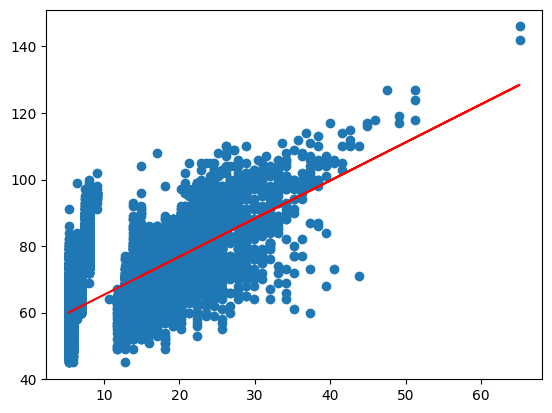

In [70]:
reg_post_pre(df_post_1min,df_post_cal)

#Pre

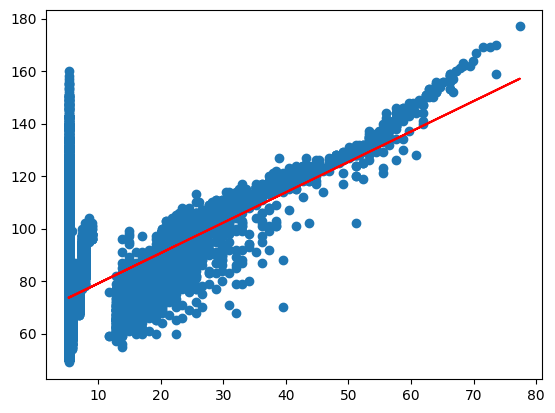

In [71]:
reg_post_pre(df_pre_1min,df_pre_cal)

In [64]:
list_1 = list(df_post_1min["Time"])
list_2 = list(df_post_cal["ActivityMinute"])

hr = []
aee = []
time = []

if len(list_1)>len(list_2):
  for i in list_1:
    if i in list_2:
      hr.append(list(df_post_1min.query("Time == '"+i+"'")['Value'])[0])
      aee.append(list(df_post_cal.query("ActivityMinute == '"+i+"'")['Calories'])[0]*4.184)
      time.append(i)

else:
  for i in list_2:
    if i in list_1:
      hr.append(list(df_post_1min.query("Time == '"+i+"'")['Value'])[0])
      aee.append(list(df_post_cal.query("ActivityMinute == '"+i+"'")['Calories'])[0]*4.184)
      time.append(i)

In [65]:
dic={
    "Time" : time,
     "HR(BPM)" : hr,
     "aEE(kJ/min)":aee
}

dataFrame = pd.DataFrame.from_dict(dic)

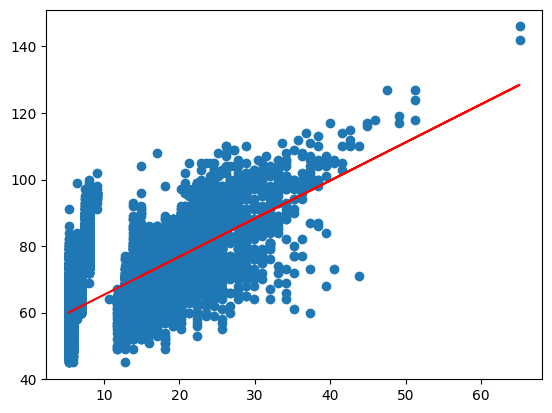

In [ ]:
dataFrame.head(30)